In [75]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [76]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int
    sr : float
    bpb: float
    boundary_percent: float
    summary : str

In [77]:
def calculate_strike_rate(state : BatsmanState):
    sr = (state['runs']/state['balls'])*100
    state['sr'] = sr
    return {'sr': sr}

In [78]:
def calculate_balls_per_boundary(state : BatsmanState):
    total_boundaries = state["fours"] + state["sixes"]
    bpb = state["balls"]/ total_boundaries if total_boundaries > 0 else state["balls"]
    state['bpb'] = bpb
    return {'bpb': bpb}

In [79]:
def calculate_boundary_percent(state:BatsmanState):
    total_boundaries = state["fours"] + state["sixes"]
    boundaries_percent = (total_boundaries/state["balls"])*100
    state['boundary_percent'] = boundaries_percent
    return {'boundary_percent' : boundaries_percent}

In [80]:
def summary_statistics(state: BatsmanState) -> BatsmanState:
    # Build a summary string and save it into the state
    summary = (
        f"Runs: {state.get('runs', 0)}, "
        f"Strike Rate: {state.get('sr', 0.0):.2f}, "
        f"Balls per Boundary: {state.get('bpb')}, "
        f"Boundaries Percent: {state.get('boundary_percent', 0.0):.2f}"
    )
    state['summary'] = summary
    return state

In [81]:
graph = StateGraph(BatsmanState)
graph.add_node("calculate_strike_rate", calculate_strike_rate)
graph.add_node("calculate_balls_per_boundary", calculate_balls_per_boundary)
graph.add_node("calculate_boundary_percent", calculate_boundary_percent)
graph.add_node("summary_statistics", summary_statistics)

# add parallel edges according to StateGraph API...
graph.add_edge(START, "calculate_strike_rate" )
graph.add_edge(START, "calculate_balls_per_boundary" )
graph.add_edge(START, "calculate_boundary_percent" )
graph.add_edge("calculate_strike_rate", "summary_statistics" )
graph.add_edge("calculate_balls_per_boundary", "summary_statistics" )
graph.add_edge("calculate_boundary_percent", "summary_statistics" )
graph.add_edge("summary_statistics", END)
workflow = graph.compile()

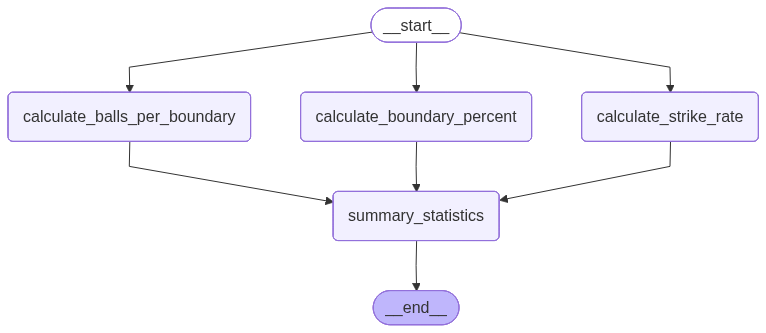

In [82]:
workflow

In [84]:
initial_state = {
    "runs": 200,
    "balls": 50,
    "fours": 40,
    "sixes": 10,

}

final_state = workflow.invoke(initial_state)
print(final_state)
print(final_state.get('summary'))

{'runs': 200, 'balls': 50, 'fours': 40, 'sixes': 10, 'sr': 400.0, 'bpb': 1.0, 'boundary_percent': 100.0, 'summary': 'Runs: 200, Strike Rate: 400.00, Balls per Boundary: 1.0, Boundaries Percent: 100.00'}
Runs: 200, Strike Rate: 400.00, Balls per Boundary: 1.0, Boundaries Percent: 100.00
